# **Librairie `numpy`**

<!-- <div class="alert alert-block alert-danger">
    Si vous utilisez ce notebook via mybinder, pensez à télécharger votre fichier à la fin de la séance afin de conserver une trace de votre travail !
</div> -->

## **Création/manipulation de tableaux**

- Créer un vecteur contenant les nombres entiers de 0 à 9 puis n'afficher que les valeurs paires de ce vecteur. Remplacer ensuite ces valeurs paires par -1.

In [1]:
import numpy as np

v = np.arange(0, 10)
v[v % 2 == 1] = -1
v

array([ 0, -1,  2, -1,  4, -1,  6, -1,  8, -1])

- Créer un vecteur de 20 valeurs flottantes aléatoirement réparties entre 1 et 50. À l'aide de la fonction `where` de `numpy`, remplacer les valeurs inférieures à 10 par 10 et celles supérieures à 30 par 30.

In [2]:
v = np.random.uniform(1, 50, 20)
v = np.where(v < 10, 10, np.where(v > 30, 30, v))
v

array([30.        , 30.        , 15.99894086, 10.        , 30.        ,
       13.72436011, 28.25704426, 30.        , 12.04963169, 14.55312491,
       15.03475133, 11.05497202, 30.        , 10.        , 10.        ,
       19.23460181, 25.72667575, 10.        , 30.        , 28.14338595])

- Créer les matrices suivantes en respectant le type et en 3 opérations maximum

    \begin{align*}
      \begin{bmatrix}
        1&1&1&1\\
        1&1&1&1\\
        1&1&1&2\\
        1&6&1&1\\
      \end{bmatrix}&\qquad
      \begin{bmatrix}
        0.& 0.& 0.& 0.& 0.\\
        2.& 0.& 0.& 0.& 0.\\
        0.& 3.& 0.& 0.& 0.\\
        0.& 0.& 4.& 0.& 0.\\
        0.& 0.& 0.& 5.& 0.\\
        0.& 0.& 0.& 0.& 6.\\
      \end{bmatrix}
    \end{align*}

    Dans le second cas, on pourra s'aider de la méthode `diag`

In [3]:
M = np.ones((4, 4))
M[2, 3] = 2
M[3, 1] = 6
M

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 2.],
       [1., 6., 1., 1.]])

In [4]:
M = np.diag([2, 3, 4, 5, 6], k=-1)
M = M[:, :5]
M

array([[0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0],
       [0, 3, 0, 0, 0],
       [0, 0, 4, 0, 0],
       [0, 0, 0, 5, 0],
       [0, 0, 0, 0, 6]])

- En utilisant la méthode `tile`, reproduire la matrice suivante à l'aide d'une seule commande

$$
    \begin{bmatrix}
        4& 3& 4& 3& 4& 3\\
        2& 1& 2& 1& 2& 1\\
        4& 3& 4& 3& 4& 3\\
        2& 1& 2& 1& 2& 1\\
    \end{bmatrix}
$$

In [5]:
M = np.tile([[4,3], [2, 1]], (2, 3))
M

array([[4, 3, 4, 3, 4, 3],
       [2, 1, 2, 1, 2, 1],
       [4, 3, 4, 3, 4, 3],
       [2, 1, 2, 1, 2, 1]])

---

## **Sale temps sur Seattle**

- Télécharger le fichier [`seattle2014.csv`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/seattle2014.csv) qui contient pour chaque jour de l'année 2014 (colonne 1), la hauteur des précipitations exprimé en dixième de millimètres (colonne 2) ainsi que les températures maximale (colonne 3) et minimale (colonne 4), exprimées en dixième de degrés Celsius, à Seattle.

In [6]:
data = np.loadtxt("data/seattle2014.csv", delimiter=",")

day = data[:, 0]
prcp = data[:, 1] / 100  # cm
Tmax = data[:, 2] / 10  # °C
Tmin = data[:, 3] / 10  # °C

- Charger l'ensemble des données dans un tableau `numpy` en prenant bien garde au caractère délimitant chaque champ puis, après avoir converti la hauteur des précipitations en centimètres et les températures en degré Celsius, calculer les valeurs suivantes sur chacune des données du fichier (hauteur des précipitations, $T_\text{min}$ et $T_\text{max}$) :

  1. moyenne, médiane et écart type
  2. valeurs minimale et maximale
  3. les quantiles à 25% et 75%

In [7]:
def print_report(data, title, unit):
    print(title)
    print(f"  valeur moyenne = {np.mean(data):.2f} {unit}")
    print(f"  valeur médiane = {np.median(data):.2f} {unit}")
    print(f"      écart type = {np.std(data):.2f} {unit}")
    print(f"     valeur min. = {np.min(data):.2f} {unit}")
    print(f"     valeur max. = {np.max(data):.2f} {unit}")
    print(f"  quantile à 25% = {np.percentile(prcp, 25):.2f} {unit}")
    print(f"  quantile à 75% = {np.percentile(prcp, 75):.2f} {unit}")


print("- Valeurs annuelles")
print_report(prcp, "Hauteur des précipitations", "cm")
print_report(Tmin, "Température minimale", unit="°C")
print_report(Tmax, "Température maximale", unit="°C")

- Valeurs annuelles
Hauteur des précipitations
  valeur moyenne = 0.34 cm
  valeur médiane = 0.00 cm
      écart type = 0.68 cm
     valeur min. = 0.00 cm
     valeur max. = 4.67 cm
  quantile à 25% = 0.00 cm
  quantile à 75% = 0.36 cm
Température minimale
  valeur moyenne = 8.66 °C
  valeur médiane = 9.40 °C
      écart type = 4.97 °C
     valeur min. = -6.00 °C
     valeur max. = 17.80 °C
  quantile à 25% = 0.00 °C
  quantile à 75% = 0.36 °C
Température maximale
  valeur moyenne = 17.00 °C
  valeur médiane = 16.10 °C
      écart type = 7.26 °C
     valeur min. = -1.60 °C
     valeur max. = 35.60 °C
  quantile à 25% = 0.00 °C
  quantile à 75% = 0.36 °C


- Afficher les valeurs ci-dessus pour la période estivale

In [8]:
print("- Valeurs estivales")
summer = (day > 20140401) & (day < 20140930)
print_report(prcp[summer], "Hauteur des précipitations", "cm")
print_report(Tmin[summer], "Température minimale", unit="°C")
print_report(Tmax[summer], "Température maximale", unit="°C")

- Valeurs estivales
Hauteur des précipitations
  valeur moyenne = 0.18 cm
  valeur médiane = 0.00 cm
      écart type = 0.48 cm
     valeur min. = 0.00 cm
     valeur max. = 3.33 cm
  quantile à 25% = 0.00 cm
  quantile à 75% = 0.36 cm
Température minimale
  valeur moyenne = 11.92 °C
  valeur médiane = 12.80 °C
      écart type = 3.13 °C
     valeur min. = 4.40 °C
     valeur max. = 17.80 °C
  quantile à 25% = 0.00 °C
  quantile à 75% = 0.36 °C
Température maximale
  valeur moyenne = 22.32 °C
  valeur médiane = 22.20 °C
      écart type = 5.43 °C
     valeur min. = 11.10 °C
     valeur max. = 35.60 °C
  quantile à 25% = 0.00 °C
  quantile à 75% = 0.36 °C


- Calculer la hauteur totale d'eau tombée à Seattle en 2014

In [9]:
print(f"Hauteur totale d'eau en 2014 : {np.sum(prcp)} cm")

Hauteur totale d'eau en 2014 : 123.28 cm


- Dénombrer le nombre total de jours dans l'année pendant lesquels il a plu à Seattle et déterminer combien de ces jours étaient pairs

In [10]:
print(f"Nombre de jours pairs avec pluie : {np.sum((prcp > 0) & (day % 2 == 0))}")

Nombre de jours pairs avec pluie : 71


---

## **Fonctions discontinues**

- Représenter la fonction d'Heaviside $\Theta(x)$ définie par

\begin{align*}
      \left\{
        \begin{array}{lll}
          \Theta(x)&=1&\text{si } x \geq 0\\
          &=0&\text{sinon}
        \end{array}
        \right.
\end{align*}

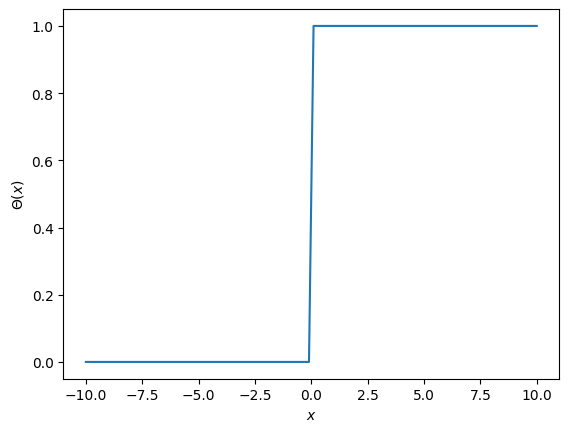

In [11]:
def heaviside(x):
    return 0.5 * (np.sign(x) + 1)


import numpy as np

x = np.linspace(-10, 10, 100)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, heaviside(x))
ax.set(xlabel=r"$x$", ylabel=r"$\Theta(x)$");

- Le noyau radioactif de $^{11}$C est un émetteur $\beta^{+}$ utilisé lors de tomographies par émission de positrons. La réaction permettant la production de cet élement est la suivante

  \begin{align*}
  p + ^{14}_{7}\text{N}\rightarrow ^{11}_{6}\text{C}+\alpha
  \end{align*}

  En tenant compte du taux de production de $^{11}$C par irradiation et du nombre de noyaux se désintégrant, on peut montrer que le nombre de noyaux de $^{11}$C au cours du temps s'exprime de la façon suivante

  \begin{align*}
      \left\{
        \begin{array}{lll}
          n(t)&=\frac{n_i}{\lambda}\left(1 - e^{-\lambda t}\right)&\text{si } t \leq t_0\\
          &=n(t_0)\,e^{-\lambda (t-t_0)}&\text{si } t > t_0
        \end{array}
        \right.
  \end{align*}

  où $\lambda=\frac{\ln2}{T_{1/2}}$ et $T_{1/2}$ = 20.36 minutes. $n_i$ correspond au taux d'irradition et est égal à 3 10$^{8}$ noyaux/s. Représenter $n(t)$ pour $t_0$ = 3 heures. ***On pourra s'aider de la fonction `piecewise` de `numpy` mais en aucun cas de boucles `for`***.

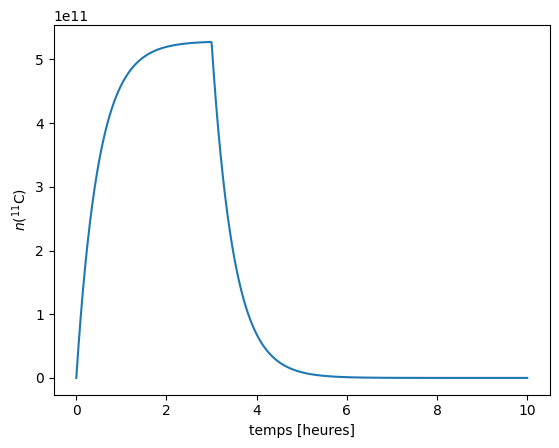

In [12]:
import numpy as np

# Définition des constantes du problème
ni = 3e8 * 3600  # noyaux/h
T12 = 20.36 / 60  # hours
l = np.log(2) / T12


def carbon11(t, t0):
    conds = [t <= t0, t > t0]
    funcs = [
        lambda t: ni / l * (1 - np.exp(-l * t)),
        lambda t: ni / l * (1 - np.exp(-l * t0)) * np.exp(-l * (t - t0)),
    ]
    return np.piecewise(t, conds, funcs)


t0 = 3  # hours
t = np.linspace(0, 10, 1000)
n = carbon11(t, t0)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(t, n)
ax.set(xlabel="temps [heures]", ylabel=r"$n(^{11}\mathrm{C})$");

À titre de comparaison, la fonction suivante

In [13]:
def carbon11bis(t, t0):
    import math

    y = np.empty(len(t))
    for i, val in enumerate(t):
        if t[i] <= t0:
            y[i] = ni / l * (1 - math.exp(-l * val))
        else:
            y[i] = ni / l * (1 - math.exp(-l * t0)) * math.exp(-l * (val - t0))
    return y

qui réalise le même calcul que `carbon11` défini plus haut mais sans user de la fonction `piecewise` de `numpy` est, peut-être plus naturelle à écrire mais n'en demeure pas moins beaucoup plus longue à exécuter

In [14]:
t = np.linspace(0, 10, 1000000)

%timeit carbon11(t, t0)

%timeit carbon11bis(t, t0)

16.4 ms ± 555 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
551 ms ± 20.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


---

## **Manipulation d'images**

Une image n'est rien d'autre qu'une matrice où chaque pixel contient une information colorimétrique. La notion de tableau *à la* `numpy` est donc parfaitement adaptée à la représentation de ces objets.

En fonction du système colorimétrique choisi, chaque pixel peut être :
- un nombre entier compris entre 0 et 255 ou un nombre flottant compris entre 0.0 et 1.0 quantifiant  le niveau de gris du pixel,
- un triplet de valeurs $(R, V, B)$ soit entières (entre 0 et 255) soit flottantes (entre 0.0 et 1.0) donnant respectivement le niveau de rouge, vert et bleu du pixel,
- un triplet de valeurs ($\ell, \alpha, \beta$) correspondant à la luminosité $\ell$, l'opposition bleu-jaune $\alpha$ et l'opposition vert-rouge $\beta$,
- ...

Les opérations mathématiques sur des tableaux `numpy` permettent ainsi de changer d'espaces colorimétriques en minimisant le nombre d'opérations. De même, la sélection par masque permet d'appliquer des transformations à des sous-espaces de l'image.

Dans la suite de l'exercice, on s'aidera des fonctions intégrées à la librairie `matplotlib` pour lire et pour représenter une image au format `png` ou `jpeg`. On utilisera en particulier les fonctions `imread` et `imshow` pour lire puis afficher l'image `matplotlib` comme suit
```python
  import matplotlib.pyplot as plt
  img = plt.imread("mon_image.png")
  plt.imshow(img)
```

### **Changement d'espace colorimétrique**

1. Créer une image de 500x500 pixels contenant du bruit blanc *i.e.* des valeurs aléatoirement réparties entre 0.0 et 1.0. Afficher l'image en utilisant l'échelle de couleur `cmap="gray"` (à passer en argument de la fonction `imshow`).

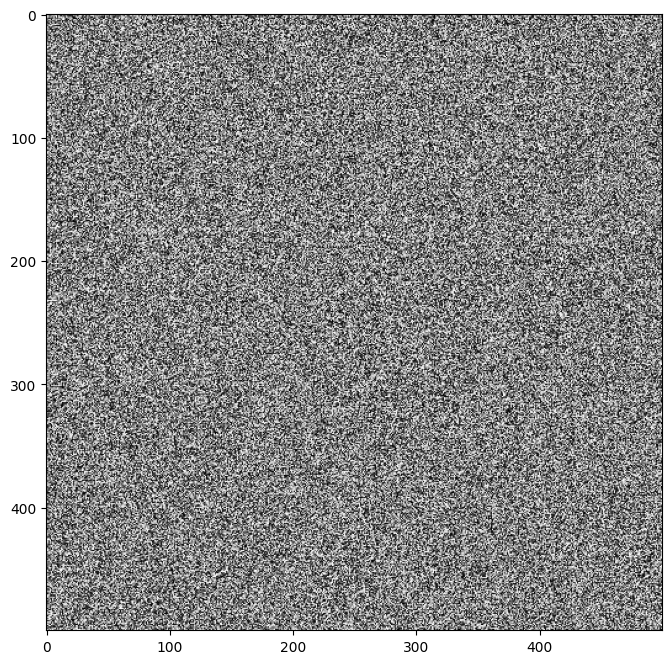

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))
img = np.random.rand(500, 500)
ax.imshow(img, cmap="gray");

2. Charger l'image [`balloon.png`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/balloon.png) puis afficher la. Quelle est la taille de l'image ? Dans quel espace colorimétrique est-elle représentée ?

Taille de l'image 300x225 pixels
Système colorimétrique (R, V, B)


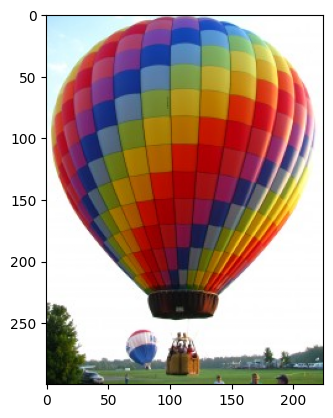

In [16]:
img = plt.imread("data/balloon.png")
plt.imshow(img)

print("Taille de l'image {}x{} pixels".format(*img.shape[:2]))

if len(img.shape) == 3:
    print("Système colorimétrique (R, V, B)")

3. La calcul de la luminance `Y` d'un pixel (également appelé niveau de gris) se fait, à partir du système colorimétrique $(R, V, B)$, par la transformation 

    $$Y = 0.2126\times R+0.7152\times V+0.0722\times B$$
    
    Convertir l'image initiale en niveau de gris et l'afficher.

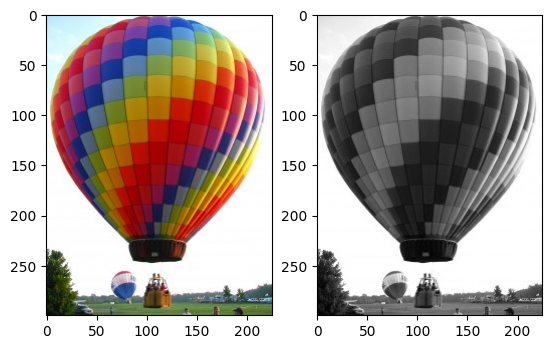

In [17]:
img1 = np.dot(img, [0.2126, 0.7152, 0.0722])
# ou img1 = img @ [0.2126, 0.7152, 0.0722] depuis Python 3.5
fig, axes = plt.subplots(1, 2)
axes[0].imshow(img)
axes[1].imshow(img1, cmap="gray");

### ***Slices & masks***

1. Dans l'espace $(R, V, B)$, créer une image 600x600 pixels initialement colorée en noire.

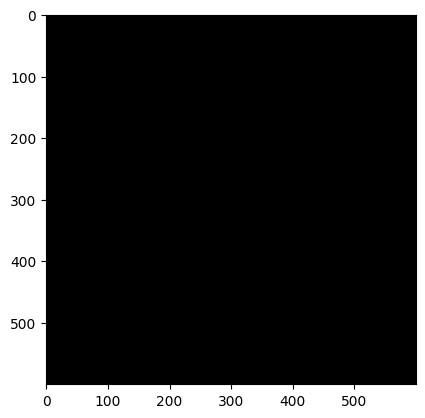

In [18]:
img = np.zeros((600, 600, 3))
plt.imshow(img);

2. Colorer en rouge et vert les rectangles représentés sur la figure de gauche ci-dessous.

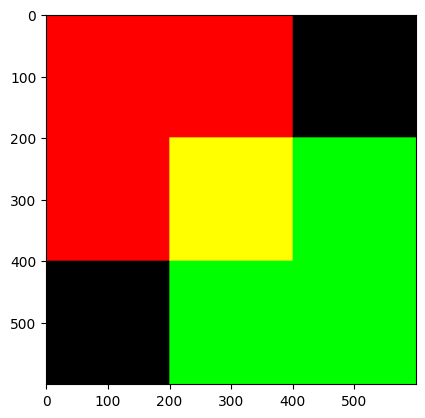

In [19]:
img[:400, :400, 0] = 1.0
img[200:, 200:, 1] = 1.0
plt.imshow(img);

3. En repartant d'une image complètement noire, colorer les disques représentés sur la figure de droite ci-dessous. *Indication : pour un centre de disque donné, on construira un tableau contenant, pour chaque pixel, la distance au centre de ce disque. On masquera par la suite les distances supérieures au rayon $R=150$, masques dont on se servira pour assigner les couleurs désirées.*

<center><img width="50%" src="https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/figures/rgb.png"/></center>

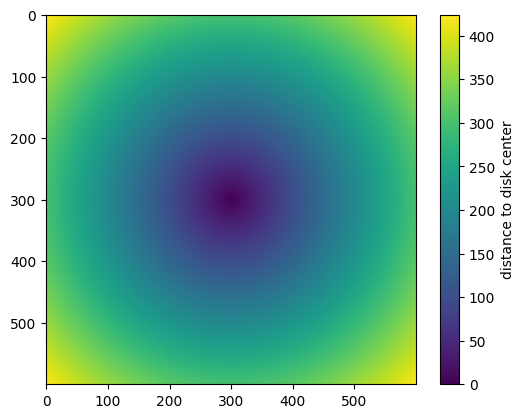

In [20]:
img = np.zeros((600, 600, 3))

# 1. Solution avec ogrid 
iy, ix = np.ogrid[:600, :600]
# 2. Solution avec tableau numpy
# ix = np.arange(600)
# iy = ix.reshape(600, -1)
# 3. Solution avec np.meshgrid
# ix, iy = np.meshgrid(np.arange(600), np.arange(600))

def get_mask(center=(300, 300), radius=150):
    dist2center = np.sqrt((ix - center[0]) ** 2 + (iy - center[1]) ** 2)
    mask = dist2center < radius
    return dist2center, mask


dist2center, mask = get_mask()

plt.imshow(dist2center)
cbar = plt.colorbar()
cbar.set_label("distance to disk center")

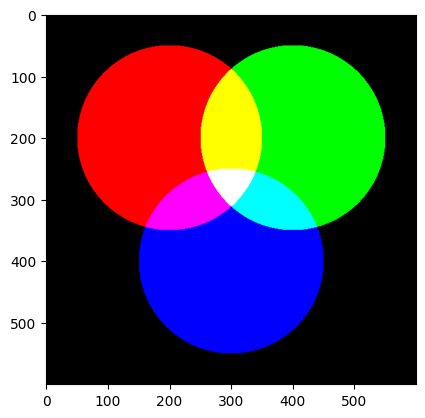

In [21]:
dist2center, mask = get_mask(center=(200, 200))
img[mask, 0] = 1
dist2center, mask = get_mask(center=(400, 200))
img[mask, 1] = 1
dist2center, mask = get_mask(center=(300, 400))
img[mask, 2] = 1

plt.imshow(img);

### ***Prologue:* Transfert de couleurs**

<!-- <div class="alert alert-block alert-info">
Un des projets informatiques en langage C++ (Magistère 1) traite du transfert de couleurs. Cette dernière partie est donc facultative et peut être sautée en première lecture.
</div>
 -->
La technique de "Transfert de couleurs" consiste à transférer les propriétés colorimétriques d'une image source à une image cible. Pour ce faire, on considère l'image [`source.png`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/source.png) à laquelle on souhaite appliquer les propriétés statistiques de couleurs de l'image [`cible.png`](https://raw.githubusercontent.com/xgarrido/master_python_teaching/master/td/data/cible.png). Il s'agit, dans un premier temps, de transformer l'espace de couleur $(R, V, B)$ des deux images vers
l'espace colorimétrique $(\ell, \alpha, \beta)$. On applique ainsi les transformations suivantes

\begin{align*}
\begin{pmatrix}L\\M\\S\end{pmatrix}&=
\begin{pmatrix}
0.3811&0.5783&0.0402\\
0.1967&0.7244&0.0782\\
0.0241&0.1288&0.8444
\end{pmatrix}
\begin{pmatrix}R\\V\\B\end{pmatrix}\\
\begin{pmatrix}\ell\\\alpha\\\beta\end{pmatrix}&=
\begin{pmatrix}
1/\sqrt{3}&0&0\\
0&1/\sqrt{6}&0\\
0&0&1/\sqrt{2}
\end{pmatrix}
\begin{pmatrix}
1&1&1\\
1&1&-2\\
1&-1&0
\end{pmatrix}
\begin{pmatrix}\ln L\\\ln M\\\ln S\end{pmatrix}
\end{align*}

Une fois dans l'espace $(\ell, \alpha, \beta)$, il s'agit de transférer les propriétés statistiques, moyenne et écart-type, de chaque canal soit

\begin{align*}
\ell_t&=\frac{\sigma^\ell_c}{\sigma^\ell_s}\left(\ell_s-\langle\ell_s\rangle\right)+\langle\ell_c\rangle\\
\alpha_t&=\frac{\sigma^\alpha_c}{\sigma^\alpha_s}\left(\alpha_s-\langle\alpha_s\rangle\right)+\langle\alpha_c\rangle\\
\beta_t&=\frac{\sigma^\beta_c}{\sigma^\beta_s}\left(\beta_s-\langle\beta_s\rangle\right)+\langle\beta_c\rangle
\end{align*}

où les indices $t, s, c$ correspondent respectivement à l'image "transférée", source et cible.

Finalement, il convient de revenir à l'espace colorimétrique $(R, V, B)$ pour l'image "transférée" *via* les transformations inverses

\begin{align*}
   \begin{pmatrix}L\\M\\S\end{pmatrix}&=
     \begin{pmatrix}
       1&1&1\\
       1&1&-1\\
       1&-2&0
     \end{pmatrix}
     \begin{pmatrix}
     1/\sqrt{3}&0&0\\
     0&1/\sqrt{6}&0\\
     0&0&1/\sqrt{2}
     \end{pmatrix}
     \begin{pmatrix}\ell\\\alpha\\\beta\end{pmatrix}\\
   \begin{pmatrix}R\\V\\B\end{pmatrix}&=\begin{pmatrix}
     4.4679&-3.5873&0.1193\\
     -1.2186&2.3809&-0.1624\\
     0.0497&-0.2439&1.2045
     \end{pmatrix}\begin{pmatrix}\exp L\\\exp M\\\exp S\end{pmatrix}\\
\end{align*}

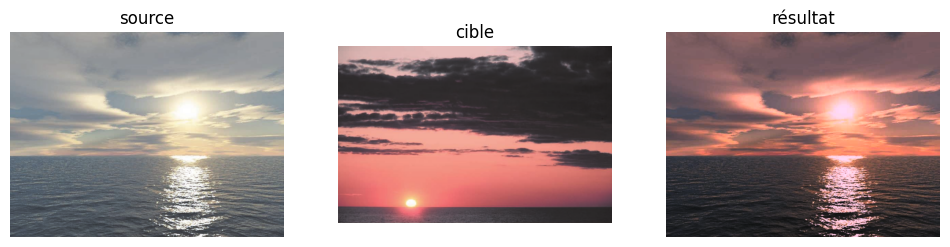

In [22]:
import matplotlib.pyplot as plt

M1 = np.array([[0.3811, 0.5783, 0.0402], [0.1967, 0.7244, 0.0782], [0.0241, 0.1288, 0.8444]])
M2 = np.array([[1 / np.sqrt(3), 0, 0], [0, 1 / np.sqrt(6), 0], [0, 0, 1 / np.sqrt(2)]])
M3 = np.array([[1, 1, 1], [1, 1, -2], [1, -1, 0]])

img_source = plt.imread("data/source.png")
img_cible = plt.imread("data/cible.png")

img_source_LMS = img_source @ M1
img_cible_LMS = img_cible @ M1
img_source_lab = np.log(img_source_LMS) @ M2 @ M3
img_cible_lab = np.log(img_cible_LMS) @ M2 @ M3

mean_source_lab = np.mean(img_source_lab, axis=(0, 1))
std_source_lab = np.std(img_source_lab, axis=(0, 1))
mean_cible_lab = np.mean(img_cible_lab, axis=(0, 1))
std_cible_lab = np.std(img_cible_lab, axis=(0, 1))

img_transfer_lab = (
    std_cible_lab / std_source_lab * (img_source_lab - mean_source_lab) + mean_cible_lab
)

M4 = M3.T
M5 = M2
M6 = np.array([[4.4679, -3.5873, 0.1193], [-1.2186, 2.3809, -0.1624], [0.0497, -0.2439, 1.2045]])

img_transfer_LMS = img_transfer_lab @ M4 @ M5
img_transfer = np.exp(img_transfer_LMS) @ M6
# Fix values > 1 (should not exist actually...)
img_transfer[img_transfer > 1] = 1.0

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, img, title in zip(
    axes, [img_source, img_cible, img_transfer], ["source", "cible", "résultat"]
):
    ax.axis("off")
    ax.set_title(title)
    ax.imshow(img)